In [1]:
# HITS method
import numpy as np
from numpy.linalg import eig
import scipy.sparse.linalg

data = open('pageRank-gr0.California.txt', 'r')

# Reading data
a = True
edge_list = np.empty((16150, 2), dtype=int)
i = 0
M=np.zeros((9664,9664), dtype=float) 

while a:
    data_line = data.readline()
    if not data_line:
        print("eof")
        a = False
        break
    if data_line[0] == 'e':
        t = data_line.split()
        edge_list[i][0] = t[1]
        edge_list[i][1] = t[2]
        i = i + 1


# Creating link matrix, binary
for i in range(len(edge_list)):
    M[edge_list[i][1]][edge_list[i][0]] = 1

column_sum = M.sum(axis=0)

# Create d
d = np.zeros(len(column_sum))
for x in range(len(column_sum)):
 if(np.sum(M[:, x]) == 0):
     d[x] = 1

# To prevent division with 0
for x in range(len(column_sum)):
    if column_sum[x] == 0:
        column_sum[x] = 1

for i in range(len(column_sum)):
    if np.sum(M[:, i]) != 0:
        M[:, i] = M[:, i] / np.sum(M[:, i])


eof


In [2]:
# Creation of A and P matrix
e = np.ones(len(column_sum))
ed = np.outer(e,d)
P = M + 1/len(d) * ed

alpha = 0.85
eeT = np.outer(e,e)
A = alpha * P + (1 - alpha) * 1/len(column_sum) * eeT

<Figure size 432x288 with 0 Axes>

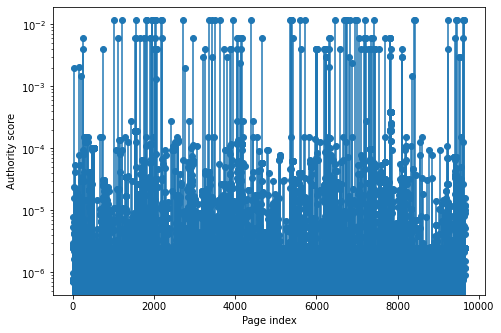

<Figure size 432x288 with 0 Axes>

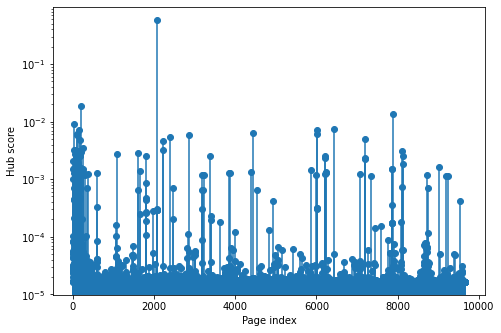

In [3]:

# Creation of authority and hub matrices
Au = A.transpose().dot(A) 
Hu = A.dot(A.transpose()) 
a=np.ones(A.shape[0])
h=np.ones(A.shape[0])
res_a = 1
res_h = 1
epsilon = 1e-3


while res_a > epsilon or res_h > epsilon:
    a_temp = a
    a = a.dot(Au)
    a = a/sum(a)
    res_a = np.linalg.norm(a - a_temp, ord=1)
    h_temp = h
    h = h.dot(Hu)
    h = h/sum(h)
    res_h = np.linalg.norm(h - h_temp, ord=1)


import matplotlib.pyplot as plt

plt.clf()
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_ylabel('Authority score')
ax.set_xlabel('Page index')
ax.set_yscale('log')
ax.stem(a)
plt.show()

plt.clf()
fig2 = plt.figure()
ax2 = fig2.add_axes([0, 0, 1, 1])
ax2.set_ylabel('Hub score')
ax2.set_xlabel('Page index')
ax2.set_yscale('log')
ax2.stem(h)
plt.show()